In [3]:
pip install pandas matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


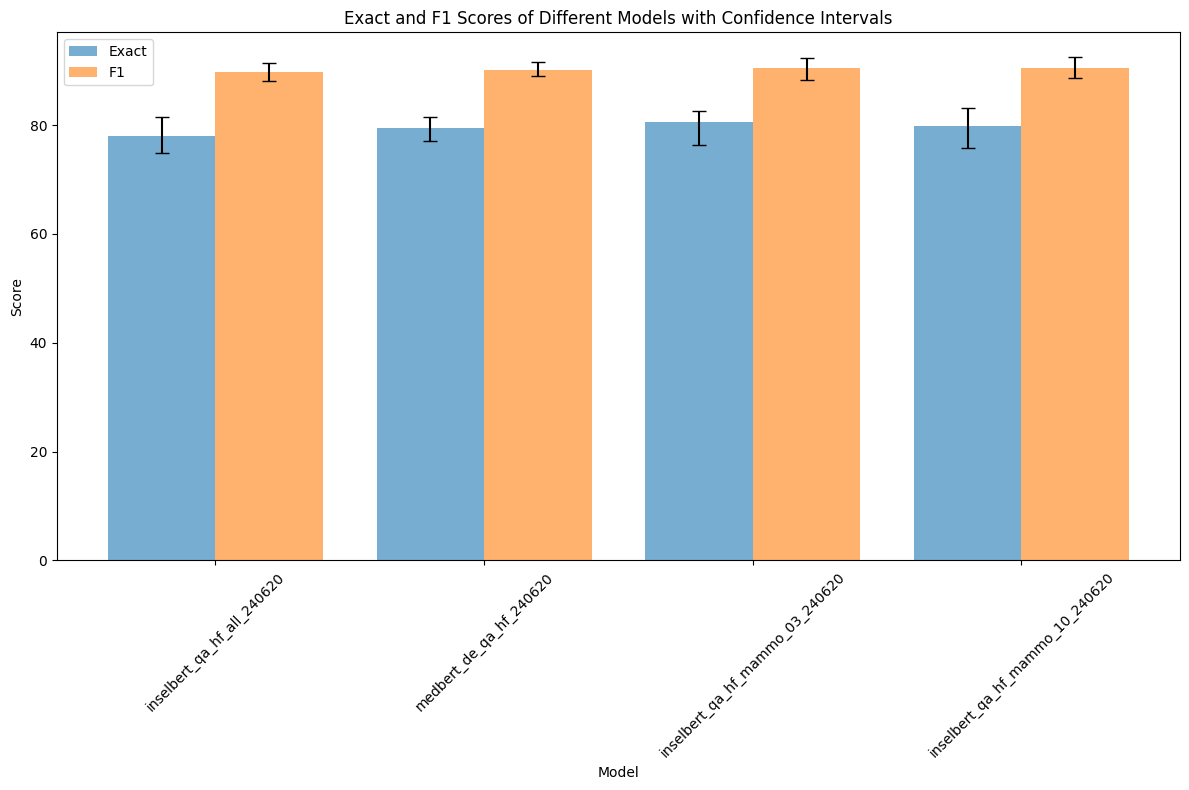

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('../data/output/evaluation_results/20240625-075841evaluation_results_qa.csv')

# Convert the string representations of dictionaries into actual dictionaries
def parse_dict_column(column):
    return column.apply(lambda x: ast.literal_eval(x))

df['exact'] = parse_dict_column(df['exact'])
df['f1'] = parse_dict_column(df['f1'])
df['HasAns_exact'] = parse_dict_column(df['HasAns_exact'])
df['HasAns_f1'] = parse_dict_column(df['HasAns_f1'])
df['best_exact'] = parse_dict_column(df['best_exact'])
df['best_f1'] = parse_dict_column(df['best_f1'])

# Extract scores and confidence intervals
def extract_scores_and_intervals(data):
    scores = data.apply(lambda x: x['score'])
    intervals = data.apply(lambda x: (x['confidence_interval'][1] - x['score'], x['score'] - x['confidence_interval'][0]))
    return scores, np.array(intervals.tolist()).T

exact_scores, exact_intervals = extract_scores_and_intervals(df['exact'])
f1_scores, f1_intervals = extract_scores_and_intervals(df['f1'])

# Extract model names for labeling
model_names = df.iloc[:, 0].apply(lambda x: x.split('/')[-2])

# Plot the diagram
fig, ax = plt.subplots(figsize=(12, 8))

# Positions for the bars
bar_width = 0.4
index = np.arange(len(model_names))

# Plot exact scores with confidence intervals
ax.bar(index, exact_scores, bar_width, yerr=exact_intervals, label='Exact', alpha=0.6, capsize=5)

# Plot f1 scores with confidence intervals
ax.bar(index + bar_width, f1_scores, bar_width, yerr=f1_intervals, label='F1', alpha=0.6, capsize=5)

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Exact and F1 Scores of Different Models with Confidence Intervals')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

